Train size: 46, Test size: 6


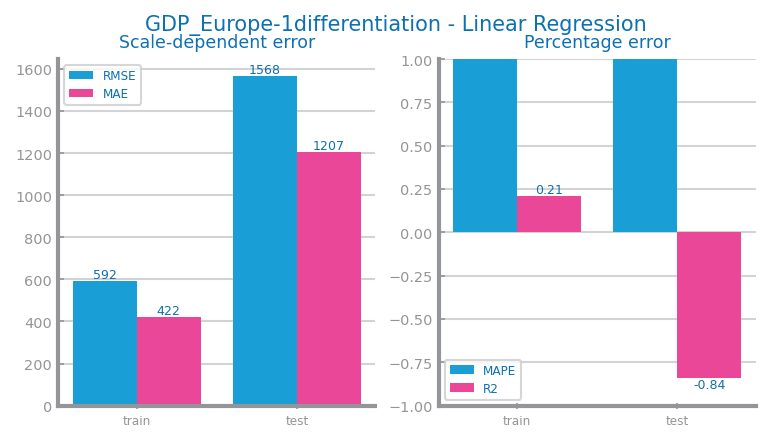

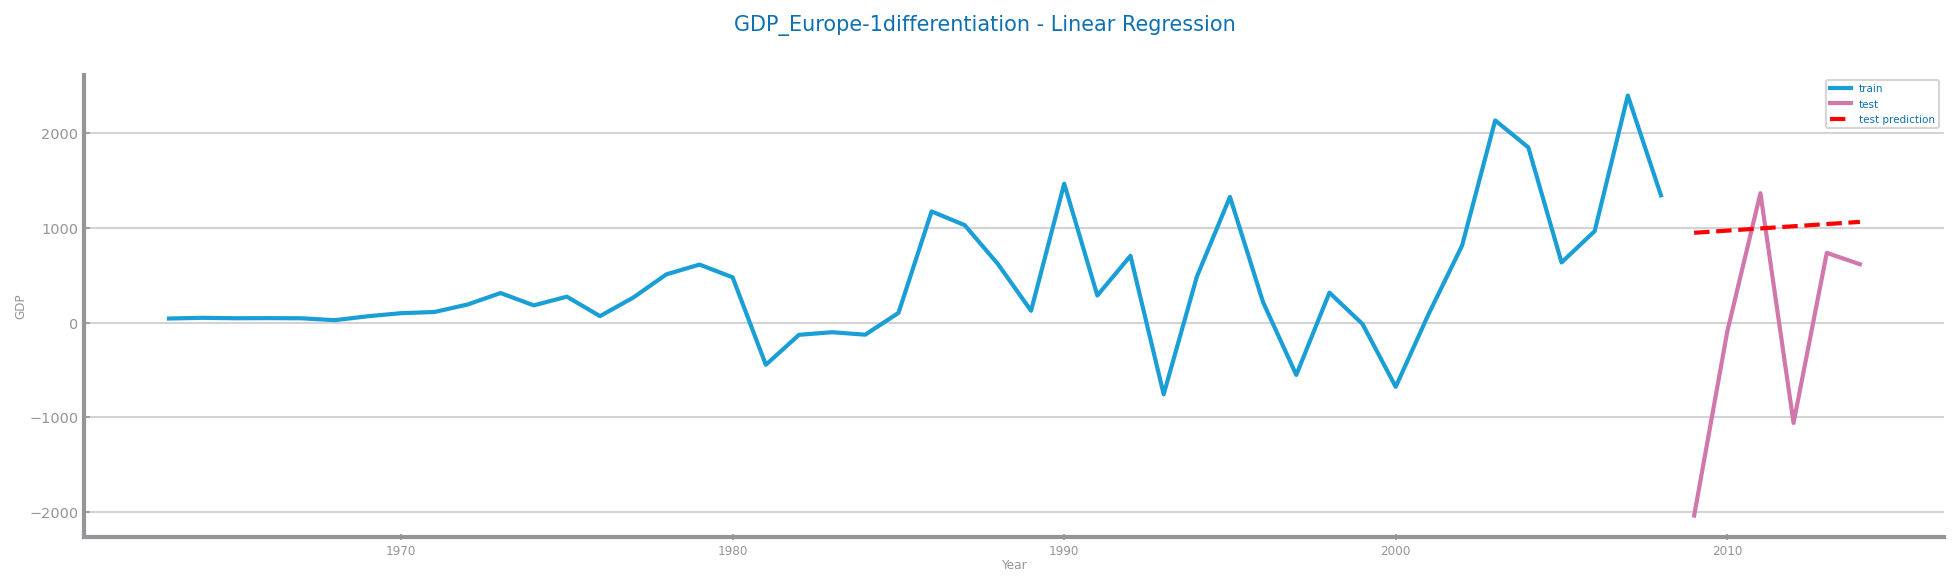

In [18]:
from pandas import Series, DataFrame, read_csv
from sklearn.linear_model import LinearRegression
from numpy import arange
from matplotlib.pyplot import savefig, show
from dslabs_functions import plot_forecasting_eval, plot_forecasting_series
import numpy as np

# Corrected train-test split function
def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    if not isinstance(data, Series):
        raise ValueError("Input data must be a pandas Series.")
    trn_size: int = int(len(data) * trn_pct)
    train: Series = data.iloc[:trn_size]
    test: Series = data.iloc[trn_size:]
    return train, test

# File details
filename: str = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/Projeto/TimeSeries/Transformation_gdp_europe/Differentiation_Datasets/first_differentiation_dataset_cleaned.csv"
file_tag: str = "GDP_Europe-1differentiation"
timecol: str = "Year"
target: str = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",
    decimal=".",
    parse_dates=[timecol],
    infer_datetime_format=True,
)

# Ensure `timecol` is correctly set as the index
data.set_index(timecol, inplace=True)

# Extract the target series
series: Series = data[target]

# Validate the extracted series
if not isinstance(series, Series):
    raise ValueError(f"Expected a Series, but got {type(series)}")

# Remove NaN values
series.dropna(inplace=True)

# Perform train-test split
train, test = series_train_test_split(series, trn_pct=0.90)

# Check train and test sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")

# Prepare input features and target values
trnX = arange(len(train)).reshape(-1, 1)  # Features for the training set
trnY = train.to_numpy()  # Target values for the training set
tstX = arange(len(train), len(series)).reshape(-1, 1)  # Features for the test set
tstY = test.to_numpy()  # Target values for the test set

# Check for NaN in target values
if np.isnan(trnY).any() or np.isnan(tstY).any():
    raise ValueError("Target values contain NaN. Ensure all missing values are handled before training.")

# Initialize and train the model
model = LinearRegression()
model.fit(trnX, trnY)

# Generate predictions for train and test sets
prd_trn: Series = Series(model.predict(trnX), index=train.index)  # Predictions for training set
prd_tst: Series = Series(model.predict(tstX), index=test.index)  # Predictions for test set

# Evaluate the model
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
savefig(f"images/{file_tag}_linear_regression_eval.png")

# Visualize the train, test, and predictions
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/{file_tag}_linear_regression_forecast.png")
show()
